SARCASM DETECTOR

In [11]:
# install the dependencies
!pip install sweetviz

In [12]:
#!pip install pandas-profiling

In [5]:
# import required libraries
import spacy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

print('Libraries are imported')

Libraries are imported


In [6]:
# read the data

df=pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [7]:
df.shape

(26709, 3)

In [13]:
# pandas profiling report
import pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='Sarcasm.html')


Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# sweetviz visualization
import sweetviz as sv
report = sv.analyze(df)
report.show_html('sweetviz.html')


ModuleNotFoundError: No module named 'sweetviz'

In [14]:
# print the column names
print('Column names \n')
for i in df.columns:
    print(i)

Column names 

article_link
headline
is_sarcastic


[]

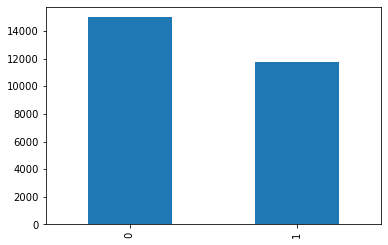

In [17]:
# value counts of the sarcasms
df['is_sarcastic'].value_counts().plot(kind='bar')
plt.plot()

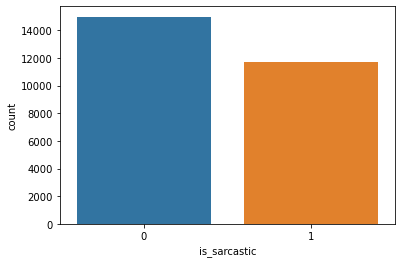

In [18]:
sns.countplot(df['is_sarcastic'])
plt.show()

In [21]:
# create a new column called num_words
df['num_words'] = df['headline'].apply(lambda x: len(str(x).split()))
print('Max no.of words', df['num_words'].max())
print('\Sentence :\n', df[df['num_words'] == 39]['headline'].values)

Max no.of words 39
\Sentence :
 ['elmore leonard, modern prose master, noted for his terse prose style and for writing about things perfectly and succinctly with a remarkable economy of words, unfortunately and sadly expired this gloomy tuesday at the age of 87 years old']


In [22]:
text=df[df['num_words'] == 39]['headline'].values 

WORD PROCESSING

In [25]:
#!python -m spacy download en

In [26]:
# tokenize the sentence
import spacy
from spacy.lang.en import English
nlp = English()
doc = nlp(text[0])
token = [w.text for w in doc]
token

['elmore',
 'leonard',
 ',',
 'modern',
 'prose',
 'master',
 ',',
 'noted',
 'for',
 'his',
 'terse',
 'prose',
 'style',
 'and',
 'for',
 'writing',
 'about',
 'things',
 'perfectly',
 'and',
 'succinctly',
 'with',
 'a',
 'remarkable',
 'economy',
 'of',
 'words',
 ',',
 'unfortunately',
 'and',
 'sadly',
 'expired',
 'this',
 'gloomy',
 'tuesday',
 'at',
 'the',
 'age',
 'of',
 '87',
 'years',
 'old']

In [30]:
# remove punctuations
print('Quotes:', spacy.lang.punctuation.LIST_QUOTES)
print('Punctuations', spacy.lang.punctuation.LIST_PUNCT)
pun = [w.text for w in doc if w.is_punct]
print('\nPunctuation in text : ', pun)

Quotes: ["\\'", '"', '”', '“', '`', '‘', '´', '’', '‚', ',', '„', '»', '«', '「', '」', '『', '』', '（', '）', '〔', '〕', '【', '】', '《', '》', '〈', '〉']
Punctuations ['…', '……', ',', ':', ';', '\\!', '\\?', '¿', '؟', '¡', '\\(', '\\)', '\\[', '\\]', '\\{', '\\}', '<', '>', '_', '#', '\\*', '&', '。', '？', '！', '，', '、', '；', '：', '～', '·', '।', '،', '۔', '؛', '٪']

Punctuation in text :  [',', ',', ',']


In [33]:
# stopwords
stopwords = list(spacy.lang.en.stop_words.STOP_WORDS)
print('number of stopwords', len(stopwords))
stop = [w.text for w in doc if w.is_stop]
print('\n stopwords in stentence:', stop)

number of stopwords 326

 stopwords in stentence: ['for', 'his', 'and', 'for', 'about', 'and', 'with', 'a', 'of', 'and', 'this', 'at', 'the', 'of']


In [34]:
# Digits
digits = [w.text for w in doc if w.is_digit]
print('Digits in sentence: ', digits)

Digits in sentence:  ['87']


In [35]:
# lemmas
lemma = [w.lemma_ for w in doc]
print(lemma)

['elmore', 'leonard', ',', 'modern', 'prose', 'master', ',', 'noted', 'for', 'his', 'terse', 'prose', 'style', 'and', 'for', 'writing', 'about', 'things', 'perfectly', 'and', 'succinctly', 'with', 'a', 'remarkable', 'economy', 'of', 'words', ',', 'unfortunately', 'and', 'sadly', 'expired', 'this', 'gloomy', 'tuesday', 'at', 'the', 'age', 'of', '87', 'years', 'old']


In [37]:
# named entities
from spacy 
spacy.displacy.render(doc, style='ent',jupyter=True)

In [39]:
# create the features dataframe
df_new = pd.DataFrame({
    'token': [w.text for w in doc],
    'lemma': [w.lemma_ for w in doc],
    'POS': [w.pos_ for w in doc],
    'TAG': [w.tag_ for w in doc],
    'DEP': [w.dep_ for w in doc],
    'is_stop': [w.is_stop for w in doc],
    'is_punct': [w.is_punct for w in doc],
    'is_digit': [w.is_digit for w in doc]
})

def highlight_true(s):
    return ['background-color:green' if v else '' for v in s]

df_new.style.apply(highlight_true, subset=['is_stop', 'is_punct', 'is_digit'])

,token,lemma,POS,TAG,DEP,is_stop,is_punct,is_digit
0,elmore,elmore,,,,False,False,False
1,leonard,leonard,,,,False,False,False
2,",",",",,,,False,True,False
3,modern,modern,,,,False,False,False
4,prose,prose,,,,False,False,False
5,master,master,,,,False,False,False
6,",",",",,,,False,True,False
7,noted,noted,,,,False,False,False
8,for,for,,,,True,False,False
9,his,his,,,,True,False,False


In [40]:
df.head()

,article_link,headline,is_sarcastic,num_words
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,12
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,14
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,14
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,13
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,11


In [41]:
def clean_text(df):
    for i in range(df.shape[0]):
        doc = nlp(df['headline'][i])
    text = [w.lemma_.lower().strip() for w in doc if not (w.is_stop | w.is_punct | w.is_digit)]
    text = " ".join(text)
    df['headline'][i] = text
    return df

In [42]:
new_df = clean_text(df)
new_df.head()

,article_link,headline,is_sarcastic,num_words
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,12
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,14
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,14
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,13
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,11


In [43]:
# implement TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), max_features=5000)
X = tf.fit_transform(new_df['headline'])
y = new_df['is_sarcastic']



In [44]:
# create the train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)


In [45]:
# create the model 
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4444
           1       0.81      0.84      0.82      3569

    accuracy                           0.84      8013
   macro avg       0.84      0.84      0.84      8013
weighted avg       0.84      0.84      0.84      8013

